# Multivariate Linear Regression from scratch - Melwyn D Souza

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score

In [364]:
nFeatures, m = 0,0

def main():
    
    global nFeatures, m
    df = pd.read_csv("trainingData.csv")
    df = df.dropna()
    data = df.values
#     print(df.head())
#     print(df.info())
#     print(df.describe())
    
    y = data[:, -1]
    X = data[:, :-1]
    X = X.reshape(len(X),len(X[0]))
    y = y.reshape(len(y),1)
                  
    nFeatures = X.shape[1]
    m = X.shape[0]

    # Standardize each of the features in the dataset. 
    for column in range(nFeatures):
        feature = X[:, column]
        feature = (feature - np.mean(feature))/np.std(feature)
        X[:, column] = feature
    
#     X = StandardScaler().fit_transform(X)
    #     print(X)

    bias, coefficients = multipleLinearRegression(X, y)
    
    # Enable code if you have a test set  (as in part 2)
    testdata_df= pd.read_csv("testData.csv")
    testdata = testdata_df.values

    X_test = testdata[:,:-1]
    y_test = testdata[:,-1]
    
    X_test = X_test.reshape(len(X_test),len(X_test[0]))
    y_test = y_test.reshape(len(y_test),1)
    
#     y_pred = hypothesis(X, coefficients, bias)
#     rSquared = r2_score(y, y_pred)

    rSquared = calculateRSquared(bias,coefficients,X_test,y_test)
    print ("Final R2 value on test data", rSquared)
    

In [365]:
def multipleLinearRegression(X, y):
    global nFeatures, m
    b = 0.00
    W = np.zeros((nFeatures,1))
    alpha = 0.1 # learning rate
    max_iter=100

    # call gredient decent, and get intercept(=bias) and coefficents
    b, W = gradient_descent(b, W, alpha, X, y, max_iter)
    
    return b, W
    

In [366]:
def gradient_descent(b, W, alpha, X, y, max_iter):
    global nFeatures, m
    cost = []
    for i in range(max_iter):
        
        y_pred = hypothesis(X, W, b)
        cost.append((np.sum(np.square(y_pred-y)))/(2*m))
        
        for j in range(nFeatures):
            W[j] = W[j] - alpha*((np.sum((y_pred-y)*X[:,[j]]))/m)
        b = b - alpha*((np.sum(y_pred-y))/m)
    
    
    # calculate R squared value for current coefficient and bias values
    rSquared = calculateRSquared(b,W,X,y)
#     rSquared = r2_score(y, y_pred)
    print ("Final R2 value on training data is: ", rSquared)
    
    #plot cost for max_iter iterations
    plt.plot(range(max_iter),cost, "g-")
    plt.title("Cost Function")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost J(X,y)")
    plt.show()
    return b,W

In [367]:
def hypothesis(X, W, b):
    y_pred = np.dot(X,W)+b
    return y_pred

In [368]:
def calculateRSquared(bias, coefficients,X, Y):
    predictedY = hypothesis(X, coefficients, bias)
    avgY = np.average(Y)
    totalSumSq = np.sum((avgY - Y)**2)
    sumSqRes = np.sum((predictedY - Y)**2)
    r2 = 1.0-(sumSqRes/totalSumSq)
    return r2

Final R2 value on training data is:  0.9964784001595464


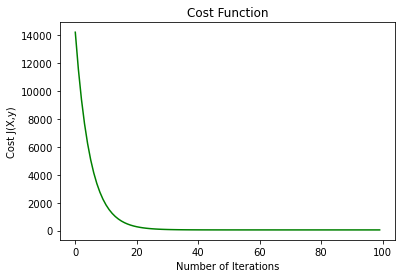

Final R2 value on test data 0.9963906540373878


In [369]:
main()